<a href="https://colab.research.google.com/github/joosk3R/jskRprac/blob/main/dacon_audio_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##autogluon 을 활용한 음성 분석 (초기 지표로 사용)

In [ ]:
!pip install autogluon

In [ ]:
import random
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm
import librosa

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import inspect
print(inspect.getsource(TabularPredictor))

In [ ]:
!unzip open (5).zip -d ./Untitled Folder

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip open (5).zip -d ./Untitled Folder'


In [ ]:
!unzip -qq "/open (5).zip"


In [ ]:
CFG = {
    'SR':16000,
    'N_MFCC':128, # Melspectrogram 벡터를 추출할 개수
    'SEED':42
}

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [ ]:
pwd

'/root'

In [ ]:
%cd /root/open

/root/open


In [ ]:
def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['path']):
        y, sr = librosa.load(path, sr=CFG['SR'])
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])
        features.append({
            'mfcc_mean': np.mean(mfcc, axis=1),
            'mfcc_max': np.max(mfcc, axis=1),
            'mfcc_min': np.min(mfcc, axis=1),
        })

    mfcc_df = pd.DataFrame(features)
    mfcc_mean_df = pd.DataFrame(mfcc_df['mfcc_mean'].tolist(), columns=[f'mfcc_mean_{i}' for i in range(CFG['N_MFCC'])])
    mfcc_max_df = pd.DataFrame(mfcc_df['mfcc_max'].tolist(), columns=[f'mfcc_max_{i}' for i in range(CFG['N_MFCC'])])
    mfcc_min_df = pd.DataFrame(mfcc_df['mfcc_min'].tolist(), columns=[f'mfcc_min_{i}' for i in range(CFG['N_MFCC'])])

    return pd.concat([mfcc_mean_df, mfcc_max_df, mfcc_min_df], axis=1)


def get_feature_mel(df):
    features = []
    for path in tqdm(df['path']):
        data, sr = librosa.load(path, sr=CFG['SR'])
        n_fft = 2048
        win_length = 2048
        hop_length = 1024
        n_mels = 128

        D = np.abs(librosa.stft(data, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
        mel = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)

        features.append({
            'mel_mean': mel.mean(axis=1),
            'mel_max': mel.min(axis=1),
            'mel_min': mel.max(axis=1),
        })
    mel_df = pd.DataFrame(features)
    mel_mean_df = pd.DataFrame(mel_df['mel_mean'].tolist(), columns=[f'mel_mean_{i}' for i in range(n_mels)])
    mel_max_df = pd.DataFrame(mel_df['mel_max'].tolist(), columns=[f'mel_max_{i}' for i in range(n_mels)])
    mel_min_df = pd.DataFrame(mel_df['mel_min'].tolist(), columns=[f'mel_min_{i}' for i in range(n_mels)])

    return pd.concat([mel_mean_df, mel_max_df, mel_min_df], axis=1)

In [ ]:
train_df.head()

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4


In [ ]:
test_df.head()

,id,path
0,TEST_0000,./test/TEST_0000.wav
1,TEST_0001,./test/TEST_0001.wav
2,TEST_0002,./test/TEST_0002.wav
3,TEST_0003,./test/TEST_0003.wav
4,TEST_0004,./test/TEST_0004.wav


In [ ]:
import os
os.chdir()

TypeError: ignored

In [ ]:
train_mf = get_mfcc_feature(train_df)


  0%|          | 0/5001 [00:00<?, ?it/s]

In [ ]:
test_mf = get_mfcc_feature(test_df)


  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
train_mel = get_feature_mel(train_df)
test_mel = get_feature_mel(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
train_x = pd.concat([train_mel, train_mf], axis=1)
test_x = pd.concat([test_mel, test_mf], axis=1)


In [ ]:
train_y = train_df['label']


In [ ]:
train_x

,mel_mean_0,mel_mean_1,mel_mean_2,mel_mean_3,mel_mean_4,mel_mean_5,mel_mean_6,mel_mean_7,mel_mean_8,mel_mean_9,...,mfcc_min_29,mfcc_min_30,mfcc_min_31,mfcc_min_32,mfcc_min_33,mfcc_min_34,mfcc_min_35,mfcc_min_36,mfcc_min_37,mfcc_min_38
0,0.084566,0.056834,0.068925,0.102323,0.096968,0.086162,0.094872,0.122292,0.132902,0.129273,...,-7.994786,-4.765324,-6.446763,-6.518156,-13.853746,-9.712667,-11.480936,-8.257807,-12.207331,-10.837424
1,0.098563,0.052329,0.056681,0.061517,0.081819,0.106868,0.138239,0.107013,0.144104,0.120996,...,-8.724536,-9.178333,-10.166977,-6.300996,-11.953010,-12.465241,-8.652713,-7.689666,-8.169021,-6.954270
2,0.083089,0.055145,0.060235,0.078781,0.078231,0.141836,0.142165,0.156169,0.129583,0.136608,...,-7.117965,-9.592178,-10.123206,-8.657376,-16.119488,-14.548070,-13.832156,-10.040055,-6.467373,-6.533032
3,0.020401,0.055993,0.088625,0.112177,0.166121,0.092082,0.082991,0.106938,0.118478,0.130794,...,-13.677727,-11.062657,-13.201270,-10.229873,-10.968072,-13.830628,-14.708564,-13.464571,-12.104868,-12.175453
4,0.074340,0.047811,0.056292,0.110727,0.126938,0.169690,0.195548,0.141796,0.155485,0.272525,...,-5.810894,-5.615780,-13.940807,-15.728250,-12.102767,-9.403395,-12.488196,-7.487092,-7.022464,-8.712124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.021166,0.058369,0.111723,0.110858,0.119897,0.068029,0.117166,0.131592,0.119517,0.130425,...,-9.421268,-13.076933,-12.181963,-9.478962,-7.664840,-10.486652,-8.909267,-12.013698,-8.000365,-12.523872
4997,0.094659,0.061243,0.070688,0.099395,0.105742,0.081150,0.080464,0.094489,0.137502,0.163564,...,-21.688774,-27.177666,-15.711486,-16.207233,-8.225772,-13.692450,-12.493994,-14.357018,-11.663677,-14.364585
4998,0.120308,0.064221,0.062565,0.062162,0.088277,0.158967,0.121889,0.090846,0.138761,0.148893,...,-6.911866,-8.124838,-7.063811,-15.318407,-8.477119,-8.114213,-7.217316,-12.557011,-13.860973,-16.578465
4999,0.074006,0.055329,0.062009,0.098595,0.098970,0.073677,0.073534,0.102842,0.120538,0.151261,...,-7.162364,-9.589893,-9.022941,-9.822235,-5.630846,-9.982182,-9.273035,-6.237118,-8.020861,-10.201331


In [ ]:
x_data = train_x
y_data = train_y
x_test = test_x

In [ ]:
train_x['label'] = train_df['label']
train_data = TabularDataset(train_x)
test_data = TabularDataset(test_x)

In [ ]:
label = 'label'
eval_metric = 'accuracy'
time_limit = 3600 * 3

In [ ]:
x_data

In [ ]:
predictor = TabularPredictor(
    label=label, eval_metric=eval_metric
).fit(train_data, presets='best_quality', time_limit=time_limit, ag_args_fit={'num_gpus': 1})

In [ ]:
predictor.leaderboard(silent=True)


In [ ]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)

In [ ]:
submission = pd.read_csv('/content/open/sample_submission.csv')
submission['label'] = model_pred
submission.to_csv('./autogluon_음성감정.csv', index=False)

In [ ]:
labels =y_data

##########데이터 분석

##########데이터 전처리


y_data = tf.keras.utils.to_categorical(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

##########모델 생성

input = tf.keras.layers.Input(shape=(None, 501))
net = tf.keras.layers.LSTM(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=5, activation='softmax')(net)
model = tf.keras.models.Model(input, net)

##########모델 학습

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

##########모델 검증

##########모델 예측

y, sr = librosa.load('left.wav', mono=True, duration=30)
'''
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
'''
mfcc = librosa.feature.mfcc(y=y, sr=sr)
#
buffer = []
'''
buffer.append(np.mean(chroma_stft))
buffer.append(np.mean(spec_cent))
buffer.append(np.mean(spec_bw))
buffer.append(np.mean(rolloff))
buffer.append(np.mean(zcr))
'''
#print(mfcc.shape) #(20, 44)
for element in mfcc:
      buffer.append(np.mean(element))
x_test = np.array([buffer])
x_test = x_test.reshape(-1, 20, 1)
print(x_test)

y_predict = model.predict(x_test)

label = labels[y_predict[0].argmax()]
confidence = y_predict[0][y_predict[0].argmax()]
print(label, confidence) #

ValueError: ignored

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size=0.2, random_state=777)


In [ ]:
vali_X=val_x
vali_y =val_y

In [ ]:
import torchvision.datasets as datasets # 데이터셋 집합체
import torchvision.transforms as transforms # 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, X, y, train_mode=True, transforms=None): #필요한 변수들을 선언
        self.X = X
        self.y = y
        self.train_mode = train_mode
        self.transforms = transforms

    def __getitem__(self, index): #index번째 data를 return
        X = self.X[index]

        if self.transforms is not None:
            X = self.transforms(X)

        if self.train_mode:
            y = self.y[index]
            return X, y
        else:
            return X

    def __len__(self): #길이 return
        return len(self.X)

In [ ]:
# 에포크 설정
num_epochs = 100

# 배치 사이즈 설정
batch_size = 10

#만든 train dataset를 DataLoader에 넣어 batch 만들기
train_dataset = CustomDataset(X=train_x, y=train_y)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

vali_dataset = CustomDataset(X=vali_X, y=vali_y)
vali_loader = DataLoader(vali_dataset, batch_size = batch_size, shuffle=False)

In [ ]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') #GPU 할당
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(929)

In [ ]:
from tqdm.auto import tqdm
import torch.nn as nn # 신경망들이 포함됨

class CNNclassification(torch.nn.Module):
    def __init__(self):
        super(CNNclassification, self).__init__()
        self.layer1 = torch.nn.Sequential(
            nn.Conv2d(40, 10, kernel_size=2, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer

        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(10, 100, kernel_size=2, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer

        self.layer3 = torch.nn.Sequential(
            nn.Conv2d(100, 200, kernel_size=2, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer

        self.layer4 = torch.nn.Sequential(
            nn.Conv2d(200, 300, kernel_size=2, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer

        self.fc_layer = nn.Sequential(
            nn.Linear(300, 10) #fully connected layer(ouput layer)
        )

    def forward(self, x):

        x = self.layer1(x) #1층

        x = self.layer2(x) #2층

        x = self.layer3(x) #3층

        x = self.layer4(x) #4층

        x = torch.flatten(x, start_dim=1) # N차원 배열 -> 1차원 배열

        out = self.fc_layer(x)
        return out

In [ ]:
import torch.optim as optim # 최적화 알고리즘들이 포함힘

model = CNNclassification().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(params = model.parameters(), lr = 1e-3 )
scheduler = None

In [ ]:
model(torch.rand(10, 40, 12, 1).to(device))


tensor([[ 6.3272e-02,  2.6929e-02, -9.6570e-03, -5.1214e-02,  1.6838e-02,
         -5.0106e-02, -5.2381e-02,  1.3524e-03,  4.0278e-02,  4.3555e-02],
        [ 6.1824e-02,  2.7923e-02, -1.1238e-02, -5.1971e-02,  1.5232e-02,
         -5.0787e-02, -5.2307e-02,  2.1474e-03,  3.7560e-02,  4.4356e-02],
        [ 6.1668e-02,  2.5830e-02, -1.0102e-02, -4.9539e-02,  1.5663e-02,
         -5.3129e-02, -5.3434e-02,  2.5749e-03,  3.8416e-02,  4.4608e-02],
        [ 6.3229e-02,  2.9607e-02, -1.0866e-02, -5.2343e-02,  1.5266e-02,
         -5.0899e-02, -5.2491e-02,  3.6425e-03,  3.8196e-02,  4.4868e-02],
        [ 6.3534e-02,  2.5505e-02, -1.0897e-02, -5.0993e-02,  1.7650e-02,
         -5.3773e-02, -5.1939e-02, -2.8021e-04,  3.5802e-02,  4.3764e-02],
        [ 6.3745e-02,  2.7125e-02, -1.0257e-02, -5.2642e-02,  1.4189e-02,
         -5.3396e-02, -5.3332e-02,  3.5178e-05,  3.8465e-02,  4.5951e-02],
        [ 6.3431e-02,  2.6569e-02, -1.1134e-02, -5.2119e-02,  1.5154e-02,
         -5.3788e-02, -5.2260e-0

In [ ]:
from tqdm.auto import tqdm

def train(model, optimizer, train_loader, scheduler, device):
    model.to(device)
    n = len(train_loader)
    best_acc = 0

    for epoch in range(1,num_epochs): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0

        for wav, label in tqdm(iter(train_loader)):

            wav, label = wav.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화

            # Data -> Model -> Output
            logit = model(wav) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산

            # 역전파
            loss.backward() #손실함수 기준 역전파
            optimizer.step() #가중치 최적화
            running_loss += loss.item()

        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))

        if scheduler is not None:
            scheduler.step()


        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        vali_loss = 0.0
        correct = 0

        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for wav, label in tqdm(iter(vali_loader)):

                wav, label = wav.to(device), label.to(device)
                logit = model(wav)
                vali_loss += criterion(logit, label)
                pred = logit.argmax(dim=1, keepdim=True)  #10개의 class중 가장 값이 높은 것을 예측 label로 추출
                correct += pred.eq(label.view_as(pred)).sum().item() #예측값과 실제값이 맞으면 1 아니면 0으로 합산
        vali_acc = 100 * correct / len(vali_loader.dataset)
        print('Vail set: Loss: {:.4f}, Accuracy: {}/{} ( {:.0f}%)\n'.format(vali_loss / len(vali_loader), correct, len(vali_loader.dataset), 100 * correct / len(vali_loader.dataset)))

        #베스트 모델 저장
        if best_acc < vali_acc:
            best_acc = vali_acc
            torch.save(model.state_dict(), 'data/saved/best_model2.pth') #이 디렉토리에 best_model.pth을 저장
            print('Model Saved.')

In [ ]:
train(model, optimizer, train_loader, scheduler, device)


  0%|          | 0/400 [00:00<?, ?it/s]

KeyError: ignored

##pycarot 조지기


In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import jinja2

from tqdm.auto import tqdm
from pycaret.classification import *
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
CFG = {
    'SR':16000,
    'N_MFCC':39,
    'SEED':1209
}


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정


In [ ]:
train_df = pd.read_csv('/content/open/train.csv')
test_df = pd.read_csv('/content/open/test.csv')


In [ ]:
def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['path']):
        y, sr = librosa.load(path, sr=CFG['SR'])
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])
        features.append({
            'mfcc_mean': np.mean(mfcc, axis=1),
            'mfcc_max': np.max(mfcc, axis=1),
            'mfcc_min': np.min(mfcc, axis=1),
        })

    mfcc_df = pd.DataFrame(features)
    mfcc_mean_df = pd.DataFrame(mfcc_df['mfcc_mean'].tolist(), columns=[f'mfcc_mean_{i}' for i in range(CFG['N_MFCC'])])
    mfcc_max_df = pd.DataFrame(mfcc_df['mfcc_max'].tolist(), columns=[f'mfcc_max_{i}' for i in range(CFG['N_MFCC'])])
    mfcc_min_df = pd.DataFrame(mfcc_df['mfcc_min'].tolist(), columns=[f'mfcc_min_{i}' for i in range(CFG['N_MFCC'])])

    return pd.concat([mfcc_mean_df, mfcc_max_df, mfcc_min_df], axis=1)


In [ ]:
train_mf = get_mfcc_feature(train_df)
test_mf = get_mfcc_feature(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
train_mf

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,mfcc_min_29,mfcc_min_30,mfcc_min_31,mfcc_min_32,mfcc_min_33,mfcc_min_34,mfcc_min_35,mfcc_min_36,mfcc_min_37,mfcc_min_38
0,-414.755737,110.100639,46.699074,23.939814,14.766221,4.820827,1.445079,-0.926153,2.892509,4.465990,...,-7.994786,-4.765324,-6.446763,-6.518156,-13.853746,-9.712667,-11.480936,-8.257807,-12.207331,-10.837424
1,-399.769531,83.051300,55.473316,31.782587,22.040751,0.985082,3.712759,-2.359319,-0.026561,0.393656,...,-8.724536,-9.178333,-10.166977,-6.300996,-11.953010,-12.465241,-8.652713,-7.689666,-8.169021,-6.954270
2,-341.145081,97.399071,38.274349,19.811539,0.731027,0.838704,-1.911201,-10.645283,-1.595292,-2.305276,...,-7.117965,-9.592178,-10.123206,-8.657376,-16.119488,-14.548070,-13.832156,-10.040055,-6.467373,-6.533032
3,-376.963715,118.961670,34.490349,24.178417,-1.065604,-1.613391,2.888372,-7.865876,-2.260846,-5.609926,...,-13.677727,-11.062657,-13.201270,-10.229873,-10.968072,-13.830628,-14.708564,-13.464571,-12.104868,-12.175453
4,-352.863220,117.553337,29.948687,31.094315,5.406391,-5.591997,-4.809399,-11.500416,-6.894948,2.946273,...,-5.810894,-5.615780,-13.940807,-15.728250,-12.102767,-9.403395,-12.488196,-7.487092,-7.022464,-8.712124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,-416.181305,112.938484,47.294235,23.111433,16.048231,6.795750,0.194628,-3.153772,-5.016596,-7.414401,...,-9.421268,-13.076933,-12.181963,-9.478962,-7.664840,-10.486652,-8.909267,-12.013698,-8.000365,-12.523872
4997,-237.811432,72.207787,3.371584,14.646128,-10.546066,7.671333,-1.676355,-8.311659,5.224692,-3.619729,...,-21.688774,-27.177666,-15.711486,-16.207233,-8.225772,-13.692450,-12.493994,-14.357018,-11.663677,-14.364585
4998,-368.228119,103.887871,40.081413,21.763754,14.120457,5.778781,-3.776188,-4.852784,-3.689435,-0.837068,...,-6.911866,-8.124838,-7.063811,-15.318407,-8.477119,-8.114213,-7.217316,-12.557011,-13.860973,-16.578465
4999,-407.114288,103.880676,44.980690,23.265039,13.279220,6.904114,-1.792800,3.526098,2.991546,-1.412130,...,-7.162364,-9.589893,-9.022941,-9.822235,-5.630846,-9.982182,-9.273035,-6.237118,-8.020861,-10.201331


In [ ]:
test_mf

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,mfcc_min_29,mfcc_min_30,mfcc_min_31,mfcc_min_32,mfcc_min_33,mfcc_min_34,mfcc_min_35,mfcc_min_36,mfcc_min_37,mfcc_min_38
0,-335.757324,125.215431,22.145767,14.351713,-1.045251,0.567860,-0.666742,-8.114830,-7.136741,-0.890950,...,-3.576203,-8.374088,-6.716224,-1.101708,-3.275164,-7.391064,-12.728262,-12.445009,-13.295605,-12.731793
1,-295.973053,92.839684,24.976181,22.831310,-10.278671,7.804742,-7.779604,-11.835019,-9.290084,-2.127427,...,-18.868702,-17.679455,-18.607599,-20.520985,-22.551987,-13.804459,-22.269970,-26.871681,-17.683559,-29.353054
2,-444.395996,109.385201,55.236771,26.486048,12.487712,9.069916,2.790433,-0.485667,-2.200089,-3.334617,...,-10.789266,-15.222191,-11.282227,-7.191500,-7.435701,-14.861184,-8.586629,-9.231279,-11.683449,-12.523497
3,-384.600220,112.463974,47.454552,17.336460,13.556947,4.677102,-5.572524,-1.354830,-2.386853,0.361085,...,-14.666992,-10.016838,-6.739859,-10.275208,-14.714573,-7.264907,-10.242790,-9.180727,-10.142057,-7.002974
4,-273.304077,97.817047,12.370095,24.591480,3.248469,-9.987857,-6.246260,-13.113685,-1.204893,0.282557,...,-10.356010,-11.320070,-15.032780,-7.742724,-20.764750,-15.395608,-8.028427,-14.360447,-7.655384,-13.455599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,-250.254913,69.372955,17.328987,12.005389,-2.463175,-7.652928,-5.683615,-2.965508,1.244487,-1.624788,...,-4.118476,-11.172956,-23.471970,-24.784920,-15.448252,-8.342232,-13.818523,-15.349741,-13.089954,-18.197884
1877,-348.593842,107.067047,27.683287,17.207047,2.634120,1.812741,-1.466080,-5.889251,3.410136,1.865329,...,-13.621458,-13.827044,-16.006924,-11.370529,-11.911840,-10.737093,-15.445568,-18.646084,-13.422024,-16.945515
1878,-295.658112,99.606911,-9.669126,4.676853,4.752311,-5.689676,1.521858,-8.851722,-3.052611,-10.759281,...,-5.731194,-7.945104,-16.738060,-21.721474,-21.617771,-17.208607,-6.390949,-14.702324,-20.153179,-17.636591
1879,-450.677094,122.865677,46.413559,21.616255,13.785479,5.433999,-2.776925,-0.925962,-1.236971,-5.947121,...,-13.317142,-12.558678,-13.658070,-8.672269,-6.960996,-9.370892,-11.193605,-13.684286,-13.128061,-11.039274


In [ ]:
test_x = test_x.drop(columns=['mfcc_mean_0','mfcc_mean_1'])
train_x = train_x.drop(columns=['mfcc_mean_0','mfcc_mean_1'])


In [ ]:
clf  = setup(train_x, preprocess = False, train_size = 0.999,
             target = 'label' ,session_id = 1209)

,Description,Value
0,Session id,1209
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(5001, 767)"
4,Transformed data shape,"(5001, 767)"
5,Transformed train set shape,"(4995, 767)"
6,Transformed test set shape,"(6, 767)"
7,Numeric features,766


In [ ]:
top3_models = compare_models(fold = 5, round = 3, sort = 'F1', n_select = 3)


NameError: ignored

## 머신러닝으론 성능이 나오지않아 딥러닝 활용

In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

import torch
device = torch. device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
base_path = '/content/drive/MyDrive'


In [ ]:
sr = 20000
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

train_df = pd.read_csv(base_path + '/train.csv')
test = pd.read_csv(base_path + '/test.csv')
submission = pd.read_csv(base_path + '/sample_submission.csv')


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['path']):
        y, sr = librosa.load(path, sr=CFG['SR'])
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])
        features.append({
            'mfcc_mean': np.mean(mfcc, axis=1),
            'mfcc_max': np.max(mfcc, axis=1),
            'mfcc_min': np.min(mfcc, axis=1),
        })

    mfcc_df = pd.DataFrame(features)
    mfcc_mean_df = pd.DataFrame(mfcc_df['mfcc_mean'].tolist(), columns=[f'mfcc_mean_{i}' for i in range(CFG['N_MFCC'])])
    mfcc_max_df = pd.DataFrame(mfcc_df['mfcc_max'].tolist(), columns=[f'mfcc_max_{i}' for i in range(CFG['N_MFCC'])])
    mfcc_min_df = pd.DataFrame(mfcc_df['mfcc_min'].tolist(), columns=[f'mfcc_min_{i}' for i in range(CFG['N_MFCC'])])

    return pd.concat([mfcc_mean_df, mfcc_max_df, mfcc_min_df], axis=1)


def get_feature_mel(df):
    features = []
    for path in tqdm(df['path']):
        data, sr = librosa.load(path, sr=CFG['SR'])
        n_fft = 2048
        win_length = 2048
        hop_length = 1024
        n_mels = 128

        D = np.abs(librosa.stft(data, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
        mel = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)

        features.append({
            'mel_mean': mel.mean(axis=1),
            'mel_max': mel.min(axis=1),
            'mel_min': mel.max(axis=1),
        })
    mel_df = pd.DataFrame(features)
    mel_mean_df = pd.DataFrame(mel_df['mel_mean'].tolist(), columns=[f'mel_mean_{i}' for i in range(n_mels)])
    mel_max_df = pd.DataFrame(mel_df['mel_max'].tolist(), columns=[f'mel_max_{i}' for i in range(n_mels)])
    mel_min_df = pd.DataFrame(mel_df['mel_min'].tolist(), columns=[f'mel_min_{i}' for i in range(n_mels)])

    return pd.concat([mel_mean_df, mel_max_df, mel_min_df], axis=1)

In [ ]:
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

In [ ]:
train_df.head()

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4


In [ ]:
%cd /content/open

/content/open


In [ ]:
train_mf = get_mfcc_feature(train_df)
test_mf = get_mfcc_feature(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
import os
import random
import warnings
from sklearn.model_selection import train_test_split

import librosa
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from tqdm.auto import tqdm
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

from transformers import AutoModelForAudioClassification, Wav2Vec2FeatureExtractor

warnings.filterwarnings(action='ignore')
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

ModuleNotFoundError: ignored

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [ ]:
CFG = {
    'SR':16_000,
    'SEED':42,
    'BATCH_SIZE':8, # out of Memory가 발생하면 줄여주세요
    'TOTAL_BATCH_SIZE':32, # 원하는 batch size
    'EPOCHS':1,
    'LR':1e-4,
}

In [ ]:
MODEL_NAME = "facebook/wav2vec2-base"


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [ ]:
train_df = pd.read_csv('./train.csv')


In [ ]:
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=CFG['SEED'])

In [ ]:
train_df.reset_index(drop=True, inplace=True)
valid_df.reset_index(drop=True, inplace=True)

In [ ]:
def speech_file_to_array_fn(df):
    feature = []
    for path in tqdm(df['path']):
        speech_array, _ = librosa.load(path, sr=CFG['SR'])
        feature.append(speech_array)
    return feature

In [ ]:
train_x = speech_file_to_array_fn(train_df)
valid_x = speech_file_to_array_fn(valid_df)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

In [ ]:
processor = Wav2Vec2FeatureExtractor.from_pretrained(MODEL_NAME)


In [ ]:
train_x

In [ ]:
class CustomDataSet(torch.utils.data.Dataset):
    def __init__(self, x, y, processor):
        self.x = x
        self.y = y
        self.processor = processor

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        input_values = self.processor(self.x[idx], sampling_rate=CFG['SR'], return_tensors="pt", padding=True).input_values
        if self.y is not None:
            return input_values.squeeze(), self.y[idx]
        else:
            return input_values.squeeze()

In [ ]:
def collate_fn(batch):
    x, y = zip(*batch)
    x = pad_sequence([torch.tensor(xi) for xi in x], batch_first=True)
    y = pad_sequence([torch.tensor([yi]) for yi in y], batch_first=True)  # Convert scalar targets to 1D tensors
    return x, y

In [ ]:
def create_data_loader(dataset, batch_size, shuffle, collate_fn, num_workers=0):
    return DataLoader(dataset,
                      batch_size=batch_size,
                      shuffle=shuffle,
                      collate_fn=collate_fn,
                      num_workers=num_workers
                      )

train_dataset = CustomDataSet(train_x, train_df['label'], processor)
valid_dataset = CustomDataSet(valid_x, valid_df['label'], processor)

train_loader = create_data_loader(train_dataset, CFG['BATCH_SIZE'], False, collate_fn, 16)
valid_loader = create_data_loader(valid_dataset, CFG['BATCH_SIZE'], False, collate_fn, 16)

In [ ]:
type(train_dataset)

__main__.CustomDataSet

In [ ]:
audio_model = AutoModelForAudioClassification.from_pretrained(MODEL_NAME)


Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['project_hid.weight', 'project_hid.bias', 'quantizer.codevectors', 'quantizer.weight_proj.weight', 'project_q.bias', 'quantizer.weight_proj.bias', 'project_q.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['projector.weight', 'classifier.bias', 'classifier

In [ ]:
class BaseModel(torch.nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.model = audio_model
        self.model.classifier = nn.Identity()
        self.classifier = nn.Linear(256, 8)

    def forward(self, x):
        output = self.model(x)
        output = self.classifier(output.logits)
        return output

In [ ]:
def validation(model, valid_loader, creterion):
    model.eval()
    val_loss = []

    total, correct = 0, 0
    test_loss = 0

    with torch.no_grad():
        for x, y in tqdm(iter(valid_loader)):
            x = x.to(device)
            y = y.flatten().to(device)

            output = model(x)
            loss = creterion(output, y)

            val_loss.append(loss.item())

            test_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total += y.size(0)
            correct += predicted.eq(y).cpu().sum()

    accuracy = correct / total

    avg_loss = np.mean(val_loss)

    return avg_loss, accuracy

In [ ]:
def train(model, train_loader, valid_loader, optimizer, scheduler):
    accumulation_step = int(CFG['TOTAL_BATCH_SIZE'] / CFG['BATCH_SIZE'])
    model.to(device)
    creterion = nn.CrossEntropyLoss().to(device)

    best_model = None
    best_acc = 0

    for epoch in range(1, CFG['EPOCHS']+1):
        train_loss = []
        model.train()
        for i, (x, y) in enumerate(tqdm(train_loader)):
            x = x.to(device)
            y = y.flatten().to(device)

            optimizer.zero_grad()

            output = model(x)
            loss = creterion(output, y)
            loss.backward()

            if (i+1) % accumulation_step == 0:
                optimizer.step()
                optimizer.zero_grad()

            train_loss.append(loss.item())

        avg_loss = np.mean(train_loss)
        valid_loss, valid_acc = validation(model, valid_loader, creterion)

        if scheduler is not None:
            scheduler.step(valid_acc)

        if valid_acc > best_acc:
            best_acc = valid_acc
            best_model = model

        print(f'epoch:[{epoch}] train loss:[{avg_loss:.5f}] valid_loss:[{valid_loss:.5f}] valid_acc:[{valid_acc:.5f}]')

    print(f'best_acc:{best_acc:.5f}')

    return best_model

In [ ]:
model = BaseModel()

optimizer = torch.optim.Adam(model.parameters(), lr=CFG['LR'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

infer_model = train(model, train_loader, valid_loader, optimizer, scheduler)

  0%|          | 0/500 [00:01<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

epoch:[1] train loss:[1.74767] valid_loss:[1.83187] valid_acc:[0.17483]
best_acc:0.17483


In [ ]:
test_df = pd.read_csv('./test.csv')


In [ ]:
def collate_fn_test(batch):
    x = pad_sequence([torch.tensor(xi) for xi in batch], batch_first=True)
    return x

In [ ]:
test_x = speech_file_to_array_fn(test_df)


  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
test_dataset = CustomDataSet(test_x, y=None, processor=processor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False, collate_fn=collate_fn_test)

In [ ]:
def inference(model, test_loader):
    model.eval()
    preds = []

    with torch.no_grad():
        for x in tqdm(iter(test_loader)):
            x = x.to(device)

            output = model(x)

            preds += output.argmax(-1).detach().cpu().numpy().tolist()

    return preds

In [ ]:
preds = inference(infer_model, test_loader)


  0%|          | 0/236 [00:00<?, ?it/s]

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['label'] = preds
submission.to_csv('./baseline_submission.csv', index=False)

huggingface


In [ ]:
import os
import torch



In [ ]:
!pip install torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 11.4 MB/s eta 0:00:00


In [ ]:
pip install --upgrade torchaudio

In [ ]:
!pip install torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 39.6 MB/s eta 0:00:00


In [ ]:
import torchaudio


In [ ]:
import os
import torch
import torchaudio
import numpy as np
import pandas as pd

from tqdm.auto import tqdm
from scipy.spatial import distance
from textblob import TextBlob
from transformers import AutoProcessor, Wav2Vec2ForCTC

In [ ]:
tqdm.pandas()


In [ ]:
%cd /content/open

/content/open


In [ ]:
DATA_DIR = ''
PREPROC_DIR = './preproc'
SAMPLE_RATE = 16000


In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_df['array'] = None
train_df['transcription'] = None

test_df['array'] = None
test_df['transcription'] = None

In [ ]:
def preproc(df):
    df = df.copy()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
    model.to(device)
    model.eval()

    df = df.copy()
    for idx, row in tqdm(df.iterrows(),total=len(df)):
        path = row['path']
        waveform, sample_rate = torchaudio.load(os.path.join(DATA_DIR, path))
        waveform = torchaudio.functional.resample(waveform, orig_freq=sample_rate, new_freq=SAMPLE_RATE)
        inputs = processor(waveform[0], sampling_rate=SAMPLE_RATE, return_tensors="pt")
        array = inputs['input_values'].cpu().numpy().tolist()[0]
        df.at[idx,'array']=array
        with torch.no_grad():
            logits = model(**inputs.to(device)).logits
        predicted_ids = torch.argmax(logits, dim=-1)
        transcription = processor.batch_decode(predicted_ids)[0].lower()
        transcription = ''.join(TextBlob(transcription).correct())
        df.loc[idx,'transcription']=transcription
    return df

In [ ]:
train_df.loc[0:2500,:]

,id,path,label,array,transcription
0,TRAIN_0000,./train/TRAIN_0000.wav,1,None,None
1,TRAIN_0001,./train/TRAIN_0001.wav,2,None,None
2,TRAIN_0002,./train/TRAIN_0002.wav,4,None,None
3,TRAIN_0003,./train/TRAIN_0003.wav,5,None,None
4,TRAIN_0004,./train/TRAIN_0004.wav,4,None,None
...,...,...,...,...,...
2496,TRAIN_2496,./train/TRAIN_2496.wav,0,None,None
2497,TRAIN_2497,./train/TRAIN_2497.wav,0,None,None
2498,TRAIN_2498,./train/TRAIN_2498.wav,4,None,None
2499,TRAIN_2499,./train/TRAIN_2499.wav,4,None,None


In [ ]:
train_df_preproc1 = preproc(train_df.loc[0:2500,:])


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2501 [00:00<?, ?it/s]

In [ ]:
train_df_preproc2 = preproc(train_df.loc[2500:,:])


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2501 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│ in preproc:18                                                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1680   │
│ in forward                                                                                       │
│                                                                                                  │
│   1677 │   │                                                                                     │
│   1678 │   │   return_dict = return_dict if return_dict is not None else self.config.use_return  │
│   1679 │   │                                                                                     │
│ ❱ 1680 │   │   outputs = self.wav2vec2(                                                          │
│   1681 │   │   │   input_values,                                                                 │
│   1682 │   │   │   attention_mask=attention_mask,                                                │
│   1683 │   │   │   output_attentions=output_attentions,                                          │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1315   │
│ in forward                                                                                       │
│                                                                                                  │
│   1312 │   │   │   hidden_states, mask_time_indices=mask_time_indices, attention_mask=attention  │
│   1313 │   │   )                                           

In [ ]:
train_df_preproc = pd.concat([train_df_preproc1,train_df_preproc2])

In [ ]:
test_df_preproc = preproc(test_df)

In [ ]:
train_df_preproc.to_csv(f'{PREPROC_DIR}/train_preproc.csv',index=False)


In [ ]:
test_df_preproc.to_csv(f'{PREPROC_DIR}/test_preproc.csv',index=False)

위에는 텍스트로 변환후 bert 사용하려 헀으나 용량 부족 실패


아래는 새로운 방법

In [ ]:
import random
import pandas as pd
import numpy as np
import os
import time
import librosa
import librosa.display
import IPython.display as ipd
from tqdm.auto import tqdm
from collections import Counter

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from torch import optim

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# Seed 고정
seed_everything(41)

In [ ]:
plt.style.use('default')
plt.rcParams['font.size'] = 12

In [ ]:
GPU_NUM = 0 # 원하는 GPU 번호 입력
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device) # change allocation of current GPU
print ('Current cuda device ', torch.cuda.current_device()) # check

# Additional Infos
if device.type == 'cuda':
    print(torch.cuda.get_device_name(GPU_NUM))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(GPU_NUM)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(GPU_NUM)/1024**3,1), 'GB')

Current cuda device  0
Tesla T4
Memory Usage:
Allocated: 0.4 GB
Cached:    0.7 GB


In [ ]:
PATH=''
train_df = pd.read_csv(PATH+'train.csv') # 모두 정상 Sample
test_df = pd.read_csv(PATH+'test.csv')


In [ ]:
train_df

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4
...,...,...,...
4996,TRAIN_4996,./train/TRAIN_4996.wav,5
4997,TRAIN_4997,./train/TRAIN_4997.wav,0
4998,TRAIN_4998,./train/TRAIN_4998.wav,1
4999,TRAIN_4999,./train/TRAIN_4999.wav,1


In [ ]:
print("-"*50)
print(train_df['label'].value_counts())

--------------------------------------------------
0    867
2    859
5    853
3    852
1    848
4    722
Name: label, dtype: int64


In [ ]:
CFG = {
    'SR':16000
}

In [ ]:
# FFT Code
def PositiveFFT(Input_rawdata,Sampling_frequency=16000, Length=16000):


    Fs = Sampling_frequency;            # Sampling frequency
    Input_rawdata = np.hanning(Length)*Input_rawdata
    L = len(Input_rawdata);             # Length of si}gnal
    X = Input_rawdata
    Y = np.fft.fft(X)

    N = int(len(Y)/2)
    Y =2*np.abs(Y[0:N])/(L/2)

    freq = np.linspace(0, Fs/2, N, endpoint=True)

    return (Y,freq)

In [ ]:
def FFT_Result(Data):

    STRIDE=16000
    Fs=16000

    sample = [Data[i:i+Fs] for i in range(0, len(Data), STRIDE)]

    F=[]
    A=[]
    for samp in sample:
        y, freq = PositiveFFT(samp)
        A.append(y)

    F=freq
    A=np.array(A).mean(axis=0)

    return F, A

In [ ]:
def get_feature(df):
    features = []
    for path in tqdm(df['path']):
        # librosa패키지를 사용하여 wav 파일 load
        wav, sr = librosa.load(PATH+path, sr=CFG['SR'])
        f, y = FFT_Result(wav)
        features.append(y)
    return np.array(features)

In [ ]:
X_train=get_feature(train_df)
X_test=get_feature(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│ in get_feature:6                                                                                 │
│ in FFT_Result:11                                                                                 │
│ in PositiveFFT:6                                                                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: operands could not be broadcast together with shapes (16000,) (5904,)

In [ ]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization, Input, DepthwiseConv2D, Add, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam, SGD

##
import librosa
import librosa.display as dsp
import IPython.display as ipd

##
import os
import warnings
import random
from tqdm import tqdm
from glob import glob
from tqdm.notebook import tqdm

warnings.filterwarnings(action='ignore')

In [ ]:
data_path = ''


In [ ]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

In [ ]:
sr = 22050

for i in os.listdir('/content/open/train')[:3]:
  print(f'{i}')
  data, sample_rate = librosa.load(f'/content/open/train/{i}', sr=sr)
  print('sample_rate:', sample_rate, ', audio shape:', data.shape)
  print('length:', data.shape[0]/float(sample_rate), 'secs')
  print('\n')

TRAIN_3383.wav
sample_rate: 22050 , audio shape: (58123,)
length: 2.635963718820862 secs


TRAIN_0498.wav
sample_rate: 22050 , audio shape: (61803,)
length: 2.802857142857143 secs


TRAIN_0769.wav
sample_rate: 22050 , audio shape: (58859,)
length: 2.669342403628118 secs




In [ ]:
train_file_names = train["path"].to_numpy()
test_file_names = test["path"].to_numpy()
target = train["label"].to_numpy()

In [ ]:
def load_audio_data(file_names, target, path):
  audios = []
  for audio in tqdm(file_names):
    an_audio, _ = librosa.load(path+audio, sr=sr)
    audio_array = np.array(an_audio)
    audios.append(audio_array)
  audios = np.array(audios)

  targets = target.copy()

  return audios, targets

In [ ]:
def random_pad(mels, pad_size, mfcc=True):

  pad_width = pad_size - mels.shape[1]
  rand = np.random.rand()
  left = int(pad_width * rand)
  right = pad_width - left

  if mfcc:
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
  else:
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')

  return mels

In [ ]:
size = 50
pad_size = 50
repeat_size = 5

In [ ]:
audio_train, target_train = load_audio_data(train_file_names, target, path='/content/open/')
audio_test, _ = load_audio_data(test_file_names, np.array([None]), path='/content/open/')

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:

audio_mels = []
audio_mfcc = []

for audio in audio_train:
    mels = booklet.feature.melspectrogram(audio, sr=sr, n_mels=size)
    mels = bookkeeper.power_to_db(mels, ref=np.max)

    mfcc = bookkeeper.feature.mfcc(audio, sr=sr, n_mfcc=size)

    for _ in range(repeat_size):
        audio_mels.append(random_pad(mels, pad_size=pad_size, mfcc=False))
        audio_mfcc.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:5                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'booklet' is not defined

In [ ]:
audio_mels_array_test = []
audio_mfcc_array_test = []

for y in audio_test:
  mels = librosa.feature.melspectrogram(y, sr=sr, n_mels=size)
  mels = librosa.power_to_db(mels, ref=np.max)


  mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=size)

  audio_mels_array_test.append(random_pad(mels, pad_size=pad_size, mfcc=False))
  audio_mfcc_array_test.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:5                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) 
were given

In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

import torch
device = torch. device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
base_path = '/content/open/'


In [ ]:
sr = 22050


In [ ]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
submission = pd.read_csv(base_path + 'sample_submission.csv')

In [ ]:
from tqdm.notebook import tqdm

train_file_names = train["path"].to_numpy()
test_file_names = test["path"].to_numpy()
target = train["label"].to_numpy()

def load_audio(file_names, target, path):
  audios = []
  for audio in tqdm(file_names):
    # librosa를 이용하여 데이터 로드
    an_audio, _ = librosa.load(path+audio, sr=sr)
    audio_array = np.array(an_audio)
    audios.append(audio_array)
  audios = np.array(audios)

  targets = target.copy()

  return audios, targets

In [ ]:
audio_train, target_train = load_audio(train_file_names, target, path= base_path )
audio_test, _ = load_audio(test_file_names, np.array([None]), path= base_path )

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
def random_pad(mels, pad_size, mfcc=True):

  pad_width = pad_size - mels.shape[1]
  rand = np.random.rand()
  left = int(pad_width * rand)
  right = pad_width - left

  if mfcc:
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
  else:
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')


  return mels

In [ ]:
size = 50
pad_size = 50
repeat_size = 5
sr = 22050

In [ ]:
audio_train[0]


array([ 7.1029267e-03,  8.6844862e-03,  7.6767411e-03, ...,
       -1.4135733e-08,  4.0259721e-08,  0.0000000e+00], dtype=float32)

In [ ]:
pip install librosa==0.8.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.2 MB/s eta 0:00:00
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201378 sha256=9688fcf03bb1ac5cb41568ac7a2ddb39cf9159388cff91e0f7857aed8188c01a
  Stored in directory: /root/.cache/pip/wheels/bf/b7/85/2f8044306ccec014930aea23ad4852fca9e2584e21c6972bc6
Successfully built librosa
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [ ]:
audio_mels = []
audio_mfcc = []

for y in audio_train:
  mels = librosa.feature.melspectrogram(y, sr=sr, n_mels=size)
  mels = librosa.power_to_db(mels, ref=np.max)

  mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=size)

  for i in range(repeat_size):
    audio_mels.append(random_pad(mels, pad_size=pad_size, mfcc=False))
    audio_mfcc.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:5                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) 
were given

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder

In [ ]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input/audio-mnist-to-mel/mel'):
    for filename in filenames:
        if filename[-4:]=='.png':
            path=os.path.join(dirname, filename)
            paths+=[path]
            l0=path.split('/')[-1].split('_')[0]
            l1=path.split('/')[-1].split('_')[1]
            label=l0+'_'+l1
            labels+=[label]

In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

In [ ]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') #GPU 할당

In [ ]:

import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(929)

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4


In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
def train_dataset():
    folder = ""
    dataset = []
    for file in tqdm(os.listdir(folder),colour='green'):
        if 'wav' in file:
            abs_file_path = os.path.join(folder,file)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = int(train[train.file_name == file].label)
            dataset.append([data,class_label])

    print("Dataset 생성 완료")
    return pd.DataFrame(dataset,columns=['data','label'])

In [ ]:
def test_dataset():
    folder = ""
    dataset = []
    for file in tqdm(os.listdir(folder),colour='green'):
        if 'wav' in file:
            abs_file_path = os.path.join(folder,file)
            data, sr = librosa.load(abs_file_path, sr = 16000)

            dataset.append([data, file])

    print("Dataset 생성 완료")
    return pd.DataFrame(dataset,columns=['data', 'file_name'])

def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['path']):
        data, sr = librosa.load(path, sr=16000)
        features.append([data, path])


In [ ]:
train_wav = get_mfcc_feature(train)
test_wav = get_mfcc_feature(test)

100%|██████████| 1881/1881 [00:25<00:00, 74.05it/s] 


In [ ]:
train_wav

In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
 physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [ ]:
!pip install llvmlite==0.31.0

!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llvmlite
  Running setup.py clean for llvmlite
Failed to build llvmlite
ERROR: Could not build wheels for llvmlite, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.9 MB/s eta 0:00:00


In [ ]:
resampy = lazy.load("resampy")

NameError: ignored

In [ ]:
max_pad_len = 174

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        resampy = lazy.load("resampy")
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e);
        return None

#     return padded_mfccs
    return mfccs

In [ ]:
extract_feature('/content/open/test/TEST_0000.wav')

file name : /content/open/test/TEST_0000.wav
Error encountered while parsing file:  /content/open/test/TEST_0000.wav
No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import tensorflow as tf
from tqdm import tqdm
from glob import glob
from google.colab import drive

import librosa
import librosa.display as dsp
import IPython.display as ipd

warnings.filterwarnings(action='ignore')


In [ ]:


%cd '/content/open'

/content/open


In [ ]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
sr = 20000


In [ ]:
for i in os.listdir('./train')[:3]:
  print(f'{i}')
  data, sample_rate = librosa.load(f'./train/{i}', sr=sr)
  print('sample_rate:', sample_rate, ', audio shape:', data.shape)
  print('length:', data.shape[0]/float(sample_rate), 'secs')
  print('\n')

TRAIN_1338.wav
sample_rate: 20000 , audio shape: (51385,)
length: 2.56925 secs


TRAIN_1882.wav
sample_rate: 20000 , audio shape: (62063,)
length: 3.10315 secs


TRAIN_1739.wav
sample_rate: 20000 , audio shape: (60060,)
length: 3.003 secs




In [ ]:
from tqdm.notebook import tqdm

train_file_names = train["path"].to_numpy()
test_file_names = test["path"].to_numpy()
target = train["label"].to_numpy()

def load_audio(file_names, target, path):
  audios = []
  for audio in tqdm(file_names):
    # librosa를 이용하여 데이터 로드
    an_audio, _ = librosa.load(audio, sr=sr)
    audio_array = np.array(an_audio)
    audios.append(audio_array)
  audios = np.array(audios)

  targets = target.copy()

  return audios, targets

In [ ]:
audio_train, target_train = load_audio(train_file_names, target, path='')
audio_test, _ = load_audio(test_file_names, np.array([None]), path='')

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
target_train

array([1, 2, 4, ..., 1, 1, 4])

In [ ]:
audio_train.shape

(5001,)

In [ ]:
def random_pad(mels, pad_size, mfcc=True):

  pad_width = pad_size - mels.shape[1]
  rand = np.random.rand()
  left = int(pad_width * rand)
  right = pad_width - left

  if mfcc:
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
  else:
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')


  return mels

TypeError: ignored

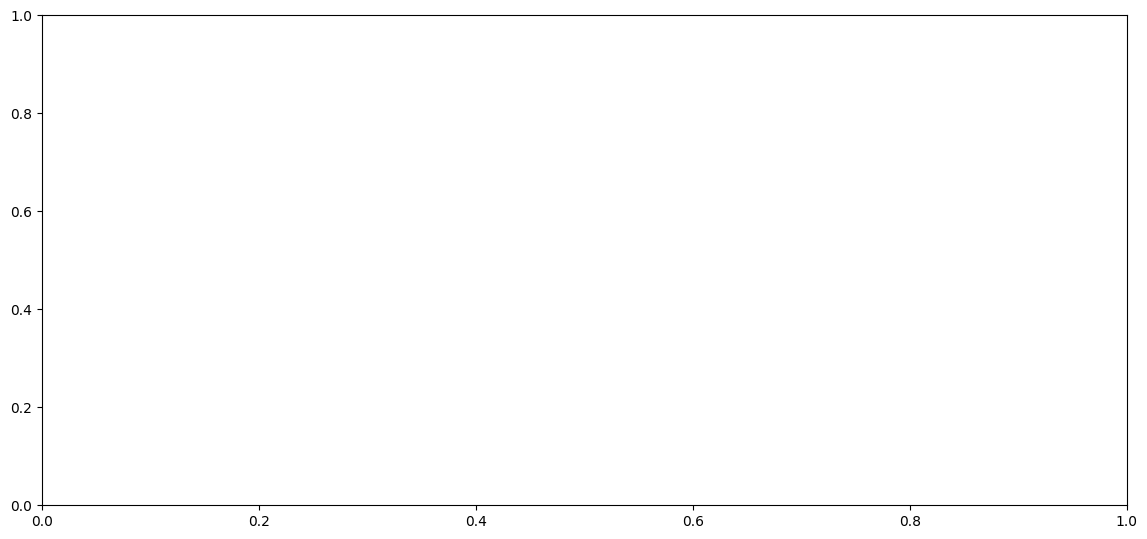

In [ ]:
plt.figure(figsize=(14,14))
ax = plt.subplot(2, 1, 1)


ax = plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(audio_train[15], sr=sr, n_mels=40)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr)
plt.title('Mel spectrogram')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')

ax = plt.subplot(2, 1, 2)
mfcc = librosa.feature.mfcc(audio_train[15], sr=sr, n_mels=40)
librosa.display.specshow(mfcc, sr=sr)
plt.title('MFCC')
plt.xlabel("Time")
plt.ylabel("MFCC coeffis")
plt.colorbar()

In [ ]:
size = 40
pad_size = 40
repeat_size = 5

In [ ]:
audio_mels = []
audio_mfcc = []

for y in audio_train:
  mels = librosa.feature.melspectrogram(y , sr=sr, n_mels=size)
  mels = librosa.power_to_db(mels, ref=np.max)

  mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=size)

  for i in range(repeat_size):
    audio_mels.append(random_pad(mels, pad_size=pad_size, mfcc=False))
    audio_mfcc.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))

TypeError: ignored

In [ ]:
from keras.utils import to_categorical

X = audio_train
y = target_train

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
yy

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)


In [ ]:
len(x_train[1])

46714

In [ ]:
n_columns = 174
n_row = 40
n_channels = 1
n_classes = 10

# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

AttributeError: ignored

딥러닝 시작


In [ ]:
pip install efficientnet_pytorch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=30efa78b73022bcd3f49bd0fb3056a090f9d90aed448c4b56e9d9847bef63ad1
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
!pip install PolynomialLRDecay
!pip install git+https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PolynomialLRDecay (from versions: none)
ERROR: No matching distribution found for PolynomialLRDecay
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git to /tmp/pip-req-build-40kcfeon
  Running command git clone --filter=blob:none --quiet https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git /tmp/pip-req-build-40kcfeon
  Resolved https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git to commit 9251dd7190eccfb1cd08e1ebce52e03cff0cb58a
  Preparing metadata (setup.py) ... done
  Created wheel for torch-poly-lr-decay: filename=torch_poly_lr_decay-0.0.1-py3-none-any.whl size=3819 sha256=951114a426cc7a515943212e8144af913883ef4b13d26ed5f9da52ebe40f4c7f
  Stored in directory: /tmp/pip-ephem-wheel-cache-4

In [ ]:
import datetime
import warnings
warnings.filterwarnings('ignore')
import torch
from glob import glob
import os
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from tqdm import tqdm
import numpy as np
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn
from torch.nn import functional as F
from sklearn.model_selection import KFold
import time
from efficientnet_pytorch import EfficientNet
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from torch_poly_lr_decay import PolynomialLRDecay
import random
from torchvision import models
from sklearn.metrics import accuracy_score, log_loss
import math
import librosa


os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2'
torch.set_num_threads(8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
%cd '/content'

/content


In [ ]:
sample_submission = pd.read_csv("dataset/sample_submission.csv")


In [ ]:
africa_train_paths = sorted(glob("dataset/train/*.wav"))
test_paths = [f'dataset/test/{k+1}.wav' for k in range(1880)]

# https://dacon.io/competitions/official/235738/codeshare/2688
def load_data(paths):
    result = []
    for path in tqdm(paths):
        # sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다.
        data, sr = librosa.load(path, sr = 16000)
        result.append(data)
    result = np.array(result)
    # 메모리가 부족할 때는 데이터 타입을 변경해 주세요 ex) np.array(data, dtype = np.float32)

    return result




def get_feature(data, sr = 16000, n_fft = 2048,win_length = 2048, hop_length = 1024,n_mels = 224):
    mel = []
    for i in tqdm(data):
        # win_length 는 음성을 작은 조각으로 자를때 작은 조각의 크기입니다.
        # hop_length 는 음성을 작은 조각으로 자를때 자르는 간격을 의미합니다.
        # n_mels 는 적용할 mel filter의 개수입니다.
        mel_ = librosa.feature.melspectrogram(data, sr = sr, n_fft = n_fft, win_length = win_length, hop_length = hop_length, n_mels = n_mels)
        mel.append(mel_)
    mel = np.array(mel)
    mel = librosa.power_to_db(mel, ref = np.max)

#     mel_mean = mel.mean()
#     mel_std = mel.std()
#     mel = (mel - mel_mean) / mel_std

    return mel


def set_length(data, d_mini):

    result = []
    for value in tqdm(data):
        value = value[:d_mini]
        if len(value)<d_mini:
            value = np.append(value, [0]*(d_mini-len(value)))
        result.append(value)
    result = np.array(result)

    return result

In [ ]:
def get_feature_mel(path):
    features = []
    for i in tqdm(path):

        data, sr = librosa.load(i)
        n_fft = 2048
        win_length = 2048
        hop_length = 1024
        n_mels = 224

        D = np.abs(librosa.stft(data, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
        mel = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)


        #m_mel = mel.mean(axis=1)
        features.append(mel)
    return features

In [ ]:
africa_train_paths

In [ ]:
africa_train_data = load_data(africa_train_paths)
np.save("./dataset/africa-sorted.npy", africa_train_data)

100%|██████████| 5001/5001 [00:04<00:00, 1045.51it/s]


In [ ]:
train_data_list = [africa_train_data]


In [ ]:






test_data = load_data(test_paths)
np.save("./dataset/test_npy.npy", test_data)

# africa_train_data = np.load("./dataset/africa-sorted.npy", allow_pickle = True)
# australia_train_data = np.load("./dataset/australia-sorted.npy", allow_pickle = True)
# canada_train_data = np.load("./dataset/canada-sorted.npy", allow_pickle = True)
# england_train_data = np.load("./dataset/england-sorted.npy", allow_pickle = True)
# hongkong_train_data = np.load("./dataset/hongkong-sorted.npy", allow_pickle = True)
# us_train_data = np.load("./dataset/us-sorted.npy", allow_pickle = True)
# train_data_list = [africa_train_data, australia_train_data, canada_train_data, england_train_data, hongkong_train_data, us_train_data]

  0%|          | 0/1880 [00:00<?, ?it/s]


FileNotFoundError: ignored

In [ ]:
train_x = np.concatenate(train_data_list, axis=0)


In [ ]:
train_x = set_length(train_x, 48000)

100%|██████████| 5001/5001 [00:08<00:00, 608.91it/s]


In [ ]:
train_x[1]

array([-0.00463867, -0.00524902, -0.00570679, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
pip uninstall librosa


In [ ]:
pip install librosa==0.9.1


In [ ]:
train_x = np.abs(train_x)

In [ ]:
type(D)

NameError: ignored

In [ ]:
train_x_200 = get_feature(data = train_x, win_length=200)


  0%|          | 8/5001 [02:11<22:23:36, 16.15s/it]

In [ ]:


train_x_400 = get_feature(data = train_x, win_length=400)
train_x_800 = get_feature(data = train_x, win_length=800)
train_x_1000 = get_feature(data = train_x, win_length=1000)


train_x_200 = train_x_200.reshape(train_x_200.shape[0], train_x_200.shape[1], train_x_200.shape[2], 1)
train_x_400 = train_x_400.reshape(train_x_400.shape[0], train_x_400.shape[1], train_x_400.shape[2], 1)
train_x_800 = train_x_800.reshape(train_x_800.shape[0], train_x_800.shape[1], train_x_800.shape[2], 1)
train_x_1000 = train_x_1000.reshape(train_x_1000.shape[0], train_x_1000.shape[1], train_x_1000.shape[2], 1)

train_x_multi = np.concatenate([train_x_200,
                                train_x_400,
                                train_x_800,
                                train_x_1000], -1)
np.save('dataset/train_x_multi.npy', train_x_multi)

  0%|          | 0/5001 [00:01<?, ?it/s]


TypeError: ignored

In [ ]:
test_x = np.load('dataset/test_npy.npy', allow_pickle=True)
test_x = set_length(test_x, 100000)
test_x_200 = get_feature(data = test_x, win_length=200)
test_x_400 = get_feature(data = test_x, win_length=400)
test_x_800 = get_feature(data = test_x, win_length=800)
test_x_1000 = get_feature(data = test_x, win_length=1000)

test_x_200 = test_x_200.reshape(test_x_200.shape[0], test_x_200.shape[1], test_x_200.shape[2], 1)
test_x_400 = test_x_400.reshape(test_x_400.shape[0], test_x_400.shape[1], test_x_400.shape[2], 1)
test_x_800 = test_x_800.reshape(test_x_800.shape[0], test_x_800.shape[1], test_x_800.shape[2], 1)
test_x_1000 = test_x_1000.reshape(test_x_1000.shape[0], test_x_1000.shape[1], test_x_1000.shape[2], 1)
test_x_multi = np.concatenate([test_x_200,
                                test_x_400,
                                test_x_800,
                                test_x_1000], -1)
np.save('dataset/test_x_multi.npy', test_x_multi)

In [ ]:
from os.path import isdir, join        #파일다루는 모듈
from pathlib import Path               #디렉토리 처리
import pandas as pd

# Math
import numpy as np               #scipy는 넘파이의 상위호환
from scipy.fftpack import fft    #fft는 고속 푸리에 변환
from scipy import signal         #컨볼루션하는 signal
from scipy.io import wavfile     #wav파일 읽는 함수.

import librosa                    #음성신호처리 기능구현

from sklearn.decomposition import PCA   #PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [ ]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")


In [ ]:
train_audio_path = '/root/open/train'

ValueError: ignored

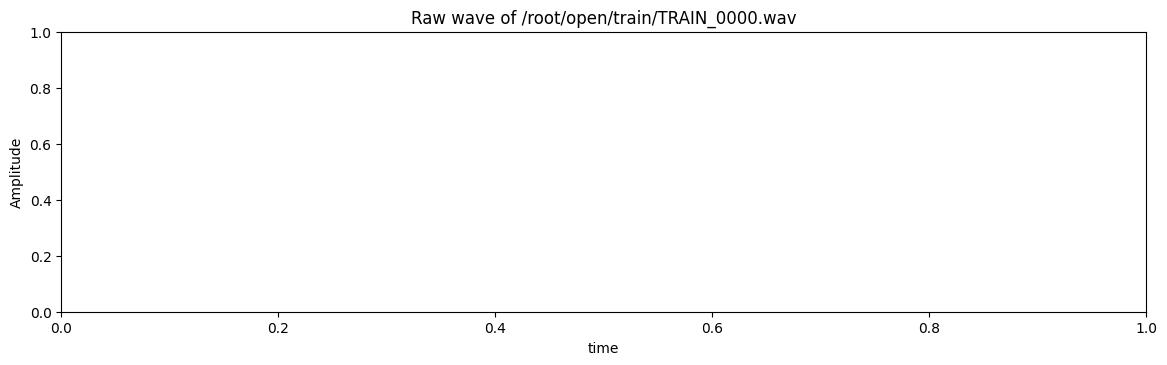

In [ ]:
train_audio_path = ''
filename = '/root/open/train/TRAIN_0000.wav'

#샘플 하나를 가져와서 진폭-시간그래프 확인 ("yes"샘플)
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

fig = plt.figure(figsize=(14, 8))

#sample_rate는 초당 샘플링 수, 아날로그 음성-> 디지털음성 변환을 위해

ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '/root/open/train/TRAIN_0000.wav' )
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
#np.linspace(시작, 끝, 채우는 개수) 로 데이터 채우기.
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

print(sample_rate)

#따라서 1600개로 나뉜 x축에 1600개의 y값을 대응하는 그래프가 된다.
print(len(samples))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import tensorflow as tf
from tqdm import tqdm
from glob import glob
from google.colab import drive

import librosa
import librosa.display as dsp
import IPython.display as ipd

warnings.filterwarnings(action='ignore')

%cd '/root/open'

/root/open


In [ ]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
sr = 20000


In [ ]:
for i in os.listdir('./train')[:3]:
  print(f'{i}')
  data, sample_rate = librosa.load(f'./train/{i}', sr=sr)
  print('sample_rate:', sample_rate, ', audio shape:', data.shape)
  print('length:', data.shape[0]/float(sample_rate), 'secs')
  print('\n')

TRAIN_0946.wav
sample_rate: 20000 , audio shape: (80748,)
length: 4.0374 secs


TRAIN_4544.wav
sample_rate: 20000 , audio shape: (48715,)
length: 2.43575 secs


TRAIN_0621.wav
sample_rate: 20000 , audio shape: (58058,)
length: 2.9029 secs




In [ ]:
from tqdm.notebook import tqdm

train_file_names = train["path"].to_numpy()
test_file_names = test["path"].to_numpy()
target = train["label"].to_numpy()

def load_audio(file_names, target, path):
  audios = []
  for audio in tqdm(file_names):
    # librosa를 이용하여 데이터 로드
    an_audio, _ = librosa.load(path+audio, sr=sr)
    audio_array = np.array(an_audio)
    audios.append(audio_array)
  audios = np.array(audios)

  targets = target.copy()

  return audios, targets

In [ ]:
audio_train, target_train = load_audio(train_file_names, target, path='')
audio_test, _ = load_audio(test_file_names, np.array([None]), path='')

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

In [ ]:
audio_train

array([array([ 7.1029700e-03,  8.5563259e-03,  7.5788191e-03, ...,
              -3.8342272e-08,  9.4299848e-09,  2.0641416e-08], dtype=float32),
       array([-4.3796664e-03, -5.3701224e-03, -5.2516032e-03, ...,
               2.8866070e-08, -2.8482418e-08,  1.5275100e-08], dtype=float32),
       array([ 7.2841360e-03,  7.5389817e-03,  6.2060389e-03, ...,
               3.2130938e-08, -4.1470010e-08,  2.6638318e-08], dtype=float32),
       ...,
       array([-3.6178534e-03, -3.8058907e-03, -4.1342401e-03, ...,
              -5.4053518e-05, -7.4377524e-05, -3.2295127e-05], dtype=float32),
       array([-0.00509594, -0.00637526, -0.00523264, ..., -0.00041059,
              -0.00032813,  0.        ], dtype=float32)               ,
       array([ 4.9544736e-03,  5.3300993e-03,  4.6381690e-03, ...,
               7.9821727e-10, -2.9948344e-10, -6.5765081e-11], dtype=float32)],
      dtype=object)

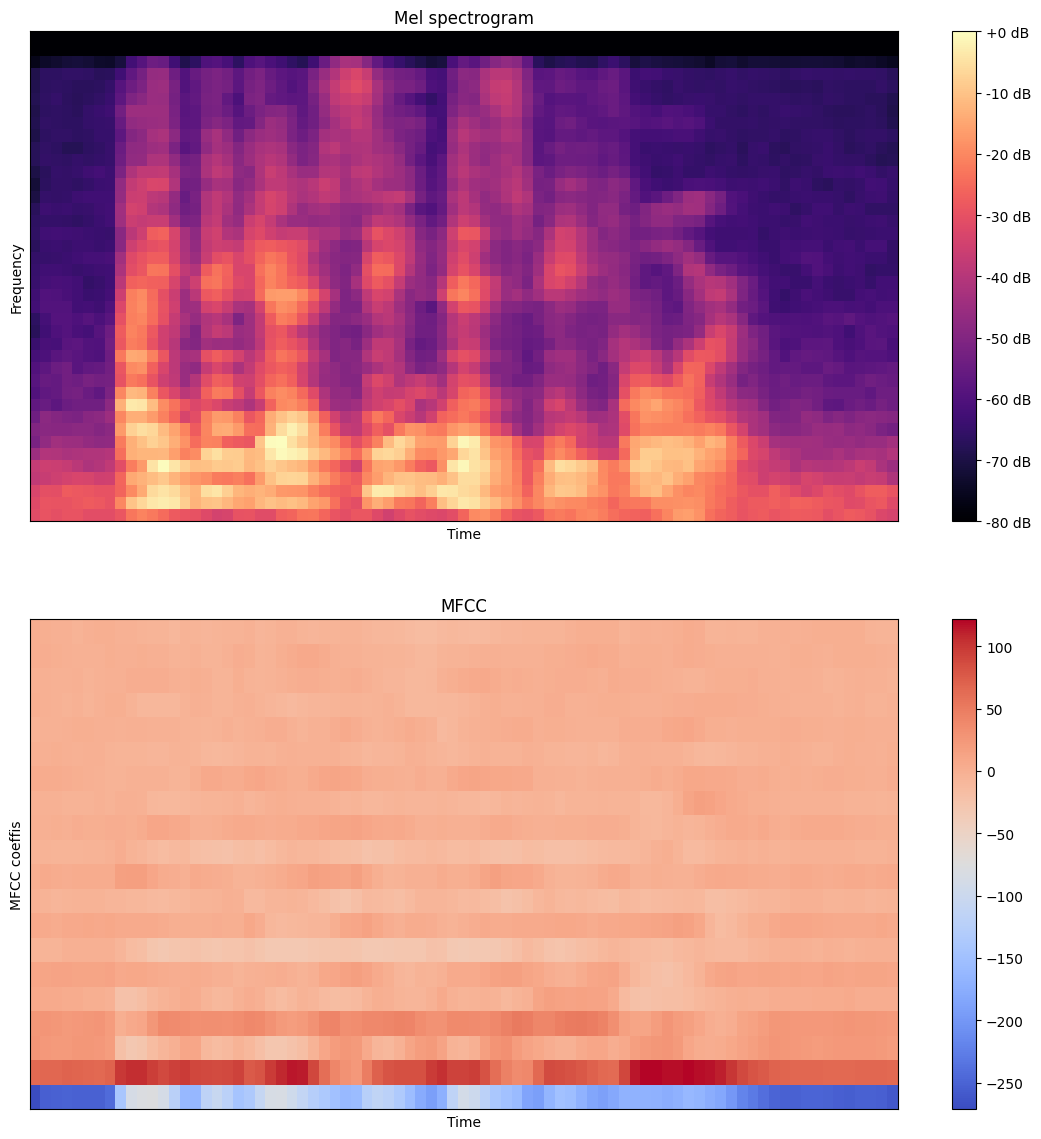

In [ ]:
plt.figure(figsize=(14,14))
ax = plt.subplot(2, 1, 1)


ax = plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(y=audio_train[15], sr=sr, n_mels=40)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr)
plt.title('Mel spectrogram')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')

ax = plt.subplot(2, 1, 2)
mfcc = librosa.feature.mfcc(y=audio_train[15], sr=sr, n_mels=40)
librosa.display.specshow(mfcc, sr=sr)
plt.title('MFCC')
plt.xlabel("Time")
plt.ylabel("MFCC coeffis")
plt.colorbar()

In [ ]:
def random_pad(mels, pad_size, mfcc=True):

  pad_width = pad_size - mels.shape[1]
  rand = np.random.rand()
  left = int(pad_width * rand)
  right = pad_width - left

  if mfcc:
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
  else:
    local_max, local_min = mels.max(), mels.min()
    mels = (mels - local_min)/(local_max - local_min)
    mels = np.pad(mels, pad_width=((0,0), (left, right)), mode='constant')


  return mels

In [ ]:
max_len = max(len(item) for item in audio_train)
print('최대 길이 :',max_len)

최대 길이 : 97432


In [ ]:
size = 40
pad_size = 200
repeat_size = 5

In [ ]:
audio_mels = []
audio_mfcc = []

for y in audio_train:
  mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=size)
  mels = librosa.power_to_db(mels, ref=np.max)

  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=size)

  for i in range(repeat_size):
    audio_mels.append(random_pad(mels, pad_size=pad_size, mfcc=False))
    audio_mfcc.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))

In [ ]:
audio_mels_array_test = []
audio_mfcc_array_test = []

for y in audio_test:
  mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=size)
  mels = librosa.power_to_db(mels, ref=np.max)

  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=size)

  audio_mels_array_test.append(random_pad(mels, pad_size=pad_size, mfcc=False))
  audio_mfcc_array_test.append(random_pad(mfcc, pad_size=pad_size, mfcc=True))

In [ ]:
type(audio_mels)

list

In [ ]:
audio_mels_array = np.array(audio_mels, np.float64)
audio_mfcc_array = np.array(audio_mfcc, np.float64)

audio_mels_array_test = np.array(audio_mels_array_test, np.float64)
audio_mfcc_array_test = np.array(audio_mfcc_array_test, np.float64)


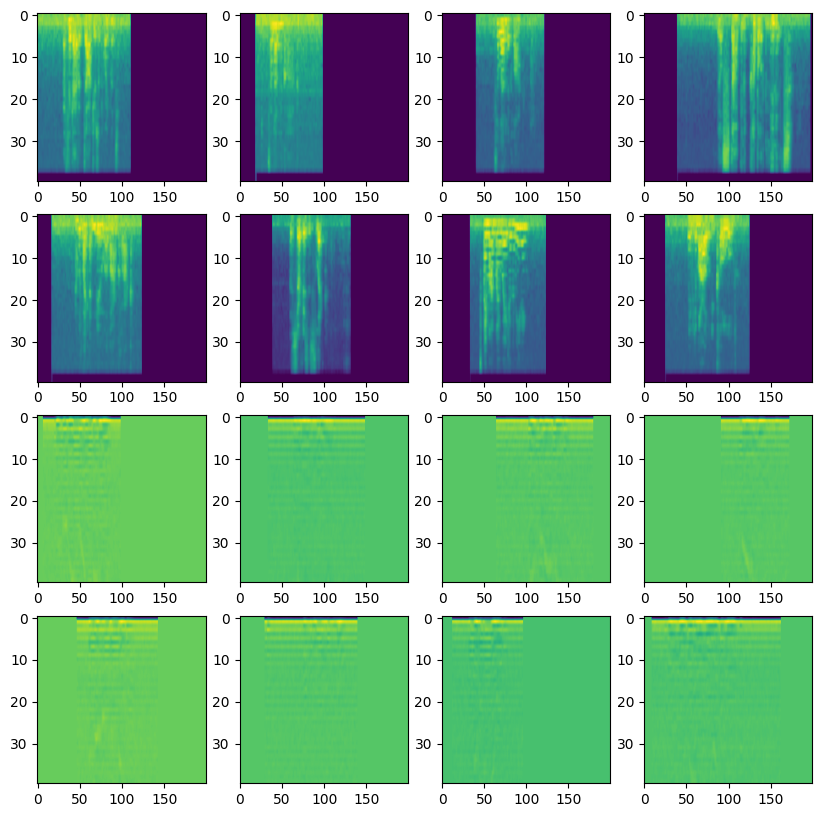

In [ ]:
target_num = 2
target_num_idx = np.where(target_train==target_num)[0]
target_num_idx = np.random.choice(target_num_idx,16)

plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)

for i, idx in enumerate(target_num_idx):
  ax = plt.subplot(4, 4, i + 1)
  if i<8:
    plt.imshow(audio_mels_array[idx], aspect='auto')
  else:
    plt.imshow(audio_mfcc_array[idx], aspect='auto')

In [ ]:
from sklearn.model_selection import train_test_split

repeated_target = np.repeat(target_train,repeat_size)
# x_train, x_val, y_train, y_val = train_test_split(audio_cqt_array, repeated_target, test_size=0.2, random_state=813, stratify=repeated_target)

In [ ]:
repeated_target

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
target_train

array([1, 2, 4, ..., 1, 1, 4])

In [ ]:
audio_mfcc_array.shape
audio_mels_array.shape

(25005, 40, 200)

In [ ]:
repeated_target.shape

(25005,)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization, Input, DepthwiseConv2D, Add, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
def residual_block(x, filters_in, filters_out):
    shortcut = x
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters_in, kernel_size=(1, 1), strides=(1, 1), padding="same",kernel_initializer='he_normal')(x)

    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters_in, kernel_size=(3, 3), strides=(1, 1), padding="same",kernel_initializer='he_normal')(x)

    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters_out, kernel_size=(1, 1), strides=(1, 1), padding="same",kernel_initializer='he_normal')(x)

    shortcut_channel = x.shape.as_list()[0]

    if shortcut_channel != filters_out:
        shortcut = Conv2D(filters_out, kernel_size=(1, 1), strides=(1, 1), padding="same",kernel_initializer='he_normal')(shortcut)

    x = Add()([x, shortcut])
    return ReLU()(x)

In [ ]:
def build_model():

  inputs = tf.keras.layers.Input(shape=(size,pad_size,1))

  outputs = Conv2D(16,(3,3),activation=None,padding='same',kernel_initializer='he_normal')(inputs)
  outputs = BatchNormalization()(outputs)
  outputs = ReLU()(outputs)
  outputs = MaxPool2D((2,2))(outputs)

  outputs = residual_block(outputs, 16, 32)
  outputs = MaxPool2D((2,2))(outputs)
  outputs = residual_block(outputs, 32, 32)
  # outputs = residual_block(outputs, 32, 32)
  outputs = residual_block(outputs, 32, 64)
  outputs = MaxPool2D((2,2))(outputs)
  outputs = residual_block(outputs, 64, 64)
  # outputs = residual_block(outputs, 64, 64)
  # outputs = MaxPool2D((2,2))(outputs)

  outputs = GlobalAveragePooling2D()(outputs)
  # outputs = Flatten()(outputs)

  outputs = Dense(32,activation=None,kernel_initializer='he_normal')(outputs)
  outputs = BatchNormalization()(outputs)
  outputs = ReLU()(outputs)
  outputs = Dropout(0.5)(outputs)

  outputs = Dense(10,activation='softmax')(outputs)
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

# model = build_model()
# model.summary()

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
repeat_size =1

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

acc_list = []
pred_list = []
skf = StratifiedKFold(n_splits=5)

for fold,(train_index, val_index) in enumerate(skf.split(audio_mels_array, repeated_target)):

  print('\n********** {fold+1} fold **********')

  preds_val_list = []
  ### melspectrogram ###
  model = build_model()
  x_train, x_val, y_train, y_val = audio_mels_array[train_index], audio_mels_array[val_index], repeated_target[train_index], repeated_target[val_index]
  filepath = "model.res_test_0615_mels.hdf5"
  callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')]
  history = model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_val,y_val), callbacks=callbacks, verbose=0)
  model = load_model(filepath)

  preds_val = model.predict(x_val)
  preds_val_list.append(preds_val)
  preds_val_label = np.argmax(preds_val, axis=1)
  pred_list.append(model.predict(audio_mels_array_test))
  print('mels_model_acc : {accuracy_score(y_val,preds_val_label):.4f}')

  ### mfcc ###
  model = build_model()
  x_train, x_val, y_train, y_val = audio_mfcc_array[train_index], audio_mfcc_array[val_index], repeated_target[train_index], repeated_target[val_index]
  filepath = "model.res_test_0615_mfcc.hdf5"
  callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')]
  history = model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_val,y_val), callbacks=callbacks, verbose=0)
  model = load_model(filepath)

  preds_val = model.predict(x_val)
  preds_val_list.append(preds_val)
  preds_val_label = np.argmax(preds_val, axis=1)
  pred_list.append(model.predict(audio_mfcc_array_test))
  print('mfcc_model_acc : {accuracy_score(y_val,preds_val_label):.4f}')

  ### ensemble ###
  val_pred_result = preds_val_list[0].copy()
  for i in range(1, len(preds_val_list)):
      val_pred_result += preds_val_list[i]
  val_pred_label = np.argmax(val_pred_result, axis=1)
  en_acc = accuracy_score(y_val,val_pred_label)
  acc_list.append(en_acc)
  print('ensemble_model_acc : {en_acc:.4f}')

print('\n\nmean_acc : {np.mean(acc_list):.4f}')


********** {fold+1} fold **********


OSError: ignored

In [ ]:
test_pred_result = pred_list[0].copy()
for i in range(1, len(pred_list)):
    test_pred_result += pred_list[i]

submission['label'] = np.argmax(test_pred_result, axis=1)
submission.head()
submission.to_csv('./0615_1.csv', index=False)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yy = to_categorical(le.fit_transform(repeated_target))

In [ ]:
yy.shape

(25005, 6)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(audio_mfcc_array, yy, test_size=0.2, random_state = 42)


In [ ]:
x_train.shape
x_test.shape


TensorShape([5001, 40, 200, 1])

In [ ]:
n_columns = 200
n_row = 40
n_channels = 1
n_classes = 6

# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

In [ ]:
y_train.shape

(20004, 6)

In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(input_shape=(n_row, n_columns, n_channels), filters=16, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 39, 199, 16)       80        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 19, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 19, 99, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 18, 98, 32)        2080      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 9, 49, 32)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 9, 49, 32)        

In [ ]:
training_epochs = 80
num_batch_size = 128

learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)

Epoch 1/80
157/157 [==============================] - 94s 573ms/step - loss: 1.3963 - accuracy: 0.4294
Epoch 2/80
157/157 [==============================] - 91s 576ms/step - loss: 1.3971 - accuracy: 0.4326
Epoch 3/80
157/157 [==============================] - 90s 570ms/step - loss: 1.3843 - accuracy: 0.4325
Epoch 4/80
157/157 [==============================] - 90s 576ms/step - loss: 1.3795 - accuracy: 0.4410
Epoch 5/80
157/157 [==============================] - 91s 579ms/step - loss: 1.3777 - accuracy: 0.4384
Epoch 6/80
157/157 [==============================] - 90s 574ms/step - loss: 1.3778 - accuracy: 0.4365
Epoch 7/80
157/157 [==============================] - 90s 575ms/step - loss: 1.3763 - accuracy: 0.4442
Epoch 8/80
157/157 [==============================] - 89s 568ms/step - loss: 1.3713 - accuracy: 0.4464
Epoch 9/80
157/157 [==============================] - 89s 567ms/step - loss: 1.3606 - accuracy: 0.4470
Epoch 10/80
157/157 [==============================] - 89s 568ms/step - l

In [ ]:
w22